<a href="https://colab.research.google.com/github/Adesh1999/ML_Regression_Project_TED-Talk-Views-Prediction/blob/main/Adesh_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color=black size=32 >Project Name</font>**   - **<font color=red size=32 >TED Talk Views Prediction</font>**



##### **Project Type**    - <font color= red>Regression</font>
##### **Contribution**    - <font color= red>Individual</font>


# **Project Summary -**

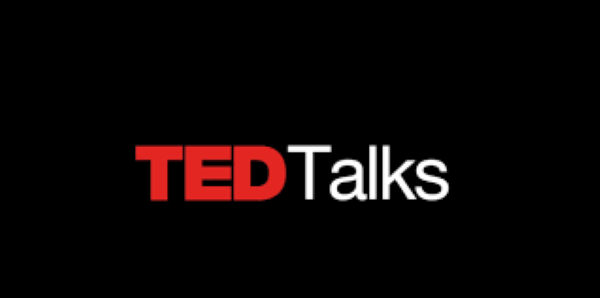

*A TED talk is a recorded public-speaking presentation that was originally given at the main TED (technology, entertainment and design) annual event or one of its many satellite events around the world. TED is a nonprofit devoted to spreading ideas, usually in the form of short, powerful talks, often called "TED talks."*




TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages. Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.








# **GitHub Link -**

**Adesh Dhole**    - https://github.com/Adesh1999/ML_Regression_Project_TED-Talk-Views-Prediction

# **Problem Statement**


*TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.*



*Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life.*

*As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.*

*The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.*


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np  # numpy for computationally efficiant operations.
import pandas as pd # pandas for data manupulation and aggregration.

#Scikit Learn for model training,model optimization, and metrics calculation.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import calendar

# import required metrics
from sklearn.metrics import (r2_score,mean_squared_error, mean_absolute_percentage_error, mean_absolute_error)

# matplotlib and seaborn for visualization and behaviour with respect to the target variable.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")



### Dataset Loading

In [ ]:
# mount a drive for loading the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Exception handling use for data loading

try:
  # Load Dataset
  file_path= '/content/drive/MyDrive/Colab Notebooks/2. ML_Capstone_Project_Regression/data_ted_talks.csv'
  df=pd.read_csv(file_path)
except FileNotFoundError:
  print('**Please provide correct file path for csv data**')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(4005, 19)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64


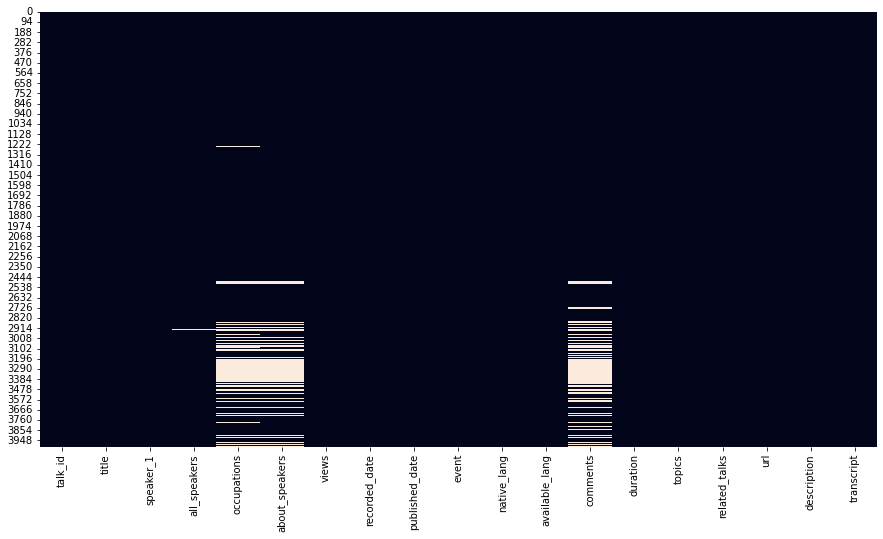

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

Given Data set contain 4005 row and 19 coloumn out of which **five coloumn contain null values** which are described below:


*   all_speakers coloumn contain **4** null values.
*   occupations coloumn contain **522** null values.
*   about_speakers coloumn contain **503** null values.
*   recorded_date colomn contain **1** null values.
*   comments coloumn contain **655** null values.



 *There is **no duplicate values** present in the data set*





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


### Variables Description 



**Variables** :     *Description* (Data Type)

**talk_id** : *identification number provided by TED* (int)

**title** : *Title of the talk* (string)

**speaker_1** : *First speaker in TED's speaker list* (string)

**all_speakers** : *Speakers in the talk* (dictionary)

**occupations** : *Occupations of the speakers* (dictionary)

**about_speakers** : *Blurb about each speaker* (dictionary)

**views(Dependent Variable)** : *Count of views* (int)

**recorded_date** : *Date the talk was recorded* (string)

**published_date** : *Date the talk was published to TED.com* (string)

**event** : *Event or medium in which the talk was given* (string)

**native_lang** : *Language the talk was given in* (string)

**available_lang**: *All available languages (lang_code) for a talk* (list)

**comments** : *Count of comments* (int)

**duration** : *Duration in seconds* (int)

**topics** : *Related tags or topics for the talk* (list)

**related_talks** : *Related talks* (key='talk_id', value='title') (dictionary)

**url** : *URL of the talk* (string)

**description** : *Description of the talk* (string)

**transcript** : *Full transcript of the talk* (string)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  talk_id is 4005 .
No. of unique values in  title is 4005 .
No. of unique values in  speaker_1 is 3274 .
No. of unique values in  all_speakers is 3306 .
No. of unique values in  occupations is 2049 .
No. of unique values in  about_speakers is 2977 .
No. of unique values in  views is 3996 .
No. of unique values in  recorded_date is 1334 .
No. of unique values in  published_date is 2962 .
No. of unique values in  event is 459 .
No. of unique values in  native_lang is 12 .
No. of unique values in  available_lang is 3902 .
No. of unique values in  comments is 601 .
No. of unique values in  duration is 1188 .
No. of unique values in  topics is 3977 .
No. of unique values in  related_talks is 4005 .
No. of unique values in  url is 4005 .
No. of unique values in  description is 4005 .
No. of unique values in  transcript is 4005 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready
# Dropping the missing values.
 
df = df.dropna() 
df.count()

talk_id           3338
title             3338
speaker_1         3338
all_speakers      3338
occupations       3338
about_speakers    3338
views             3338
recorded_date     3338
published_date    3338
event             3338
native_lang       3338
available_lang    3338
comments          3338
duration          3338
topics            3338
related_talks     3338
url               3338
description       3338
transcript        3338
dtype: int64

In [ ]:
#again checking is there any null values are not
print(df.isnull().sum())

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64


In [ ]:
# Dataset Rows & Columns count
df.shape

(3338, 19)

In [ ]:
#covert datatype string to datetime
df['recorded_date '] = pd.to_datetime(df['recorded_date'])
df['published_date '] = pd.to_datetime(df['published_date'])

In [ ]:
df['recorded_date'] = pd.to_datetime(df['recorded_date'], errors='coerce')
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [ ]:
# first and last date on which a show was recorded and published
df.recorded_date.min(),df.recorded_date.max()


(Timestamp('1984-02-02 00:00:00'), Timestamp('2020-04-22 00:00:00'))

In [ ]:
df.published_date.min(),df.published_date.max()

(Timestamp('2006-06-27 00:00:00'), Timestamp('2020-04-28 00:00:00'))

In [ ]:
# Adding new attributes Recorded_month and Recorded_year of recorded date
df['Recorded_month'] = df['recorded_date'].dt.month
df['Recorded_year'] = df['recorded_date'].dt.year
df.drop('recorded_date', axis=1, inplace=True)

In [ ]:
# Adding new attributes published_month and Published_year of published_date
df['published_month'] = df['published_date'].dt.month
df['Published_year'] = df['published_date'].dt.year
df.drop('published_date', axis=1, inplace=True)

In [ ]:
# Dataset Rows & Columns count
df.shape

(3338, 23)

In [ ]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 4002
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   talk_id          3338 non-null   int64         
 1   title            3338 non-null   object        
 2   speaker_1        3338 non-null   object        
 3   all_speakers     3338 non-null   object        
 4   occupations      3338 non-null   object        
 5   about_speakers   3338 non-null   object        
 6   views            3338 non-null   int64         
 7   event            3338 non-null   object        
 8   native_lang      3338 non-null   object        
 9   available_lang   3338 non-null   object        
 10  comments         3338 non-null   float64       
 11  duration         3338 non-null   int64         
 12  topics           3338 non-null   object        
 13  related_talks    3338 non-null   object        
 14  url              3338 non-null   object 

### What all manipulations have you done and insights you found?

The given data set contain 16 to 17 percent data contain null values.

Firstly i drop all the null values after that we get a **3338 records** which have a values for all tables present.

Now Dataset contain 3338 rows and 23 coloumns as we divided recoded date and published date to month and years. now we are ready to do analysis. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 - Pie Chart on Variable i.e., Native_Language (Univariate)**

en       3306
es         15
fr          7
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
ja          1
it          1
Name: native_lang, dtype: int64


<Axes: ylabel='native_lang'>

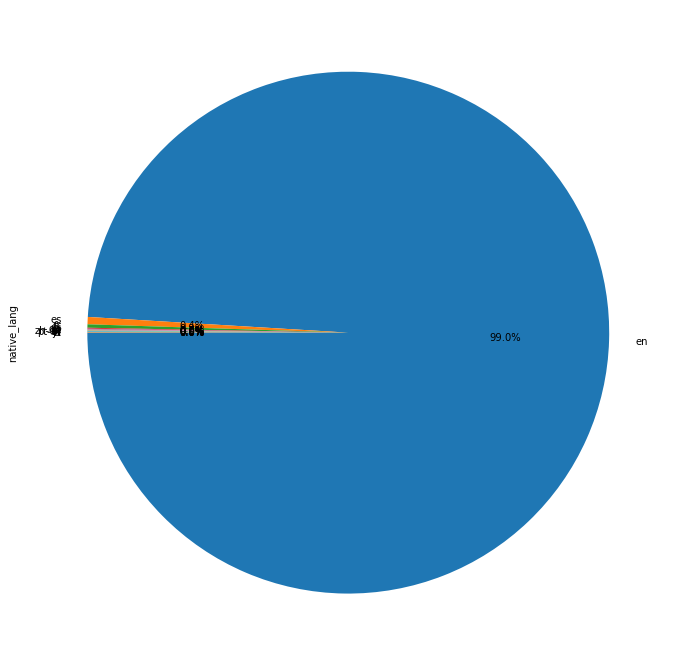

In [ ]:

# Chart - 1 visualization code (pie chart)
# Native Language Column Value Counts

print(df.native_lang.value_counts())
df.native_lang.value_counts().plot(kind='pie',
                              figsize=(12,12),
                               autopct="%1.1f%%",
                             
                               startangle=180,            
                                  )

##### **1. Why did you pick the specific chart?**

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the native language.

##### **2. What is/are the insight(s) found from the chart?**

From the above chart I got to know that, there are 3306 viewers which are having native language english which is 99% of the whole Viewer data given in the dataset.

In other hand, 32 viewers which is 1% of the whole Viewer data given in the dataset.

There are 12 Native Languages are there 99% Belong to one Language And 1% Belong to remaining eleven Languages.

This is conclude that ted talk held in english give the more views to videos.

##### **3. Will the gained insights help creating a positive business impact?** 
**Are there any insights that lead to negative growth? Justify with specific reason.**

Language barrier is often referred to as viewer attrition, or viewer defection which is the rate at which the viewers are lost.english language videos will catch the more viewers attainsion which lead to growth in views and positive impact. 

It's easy to loss viewers but too difficult to aquire one. One lossed viewer will make 3-4 viewers away those might be acquired by your platform 
with "POWER OF WORDS".

In this world of digitisation there are lots of platform which are here to spread a knowledge  So, "POWER OF WORDS" also comes into action that wrong and bad reviews spread first if anyone cant understand that mean it is bad it leads to negative growth.


#### **Chart - 2 - Bar Chart Speaker Vs. View Percentage (Bivariate with Categorical - Numerical)**

          speaker_1  Average view %
0         Amy Cuddy    5.707427e+09
1      James Veitch    3.942182e+09
2         Tim Urban    3.797682e+09
3   Cameron Russell    3.387455e+09
4  Robert Waldinger    3.239671e+09
5       Simon Sinek    3.133059e+09
6        Mary Roach    3.097763e+09
7       Brené Brown    3.064299e+09
8      Pamela Meyer    2.874887e+09
9  Sir Ken Robinson    2.812684e+09
 


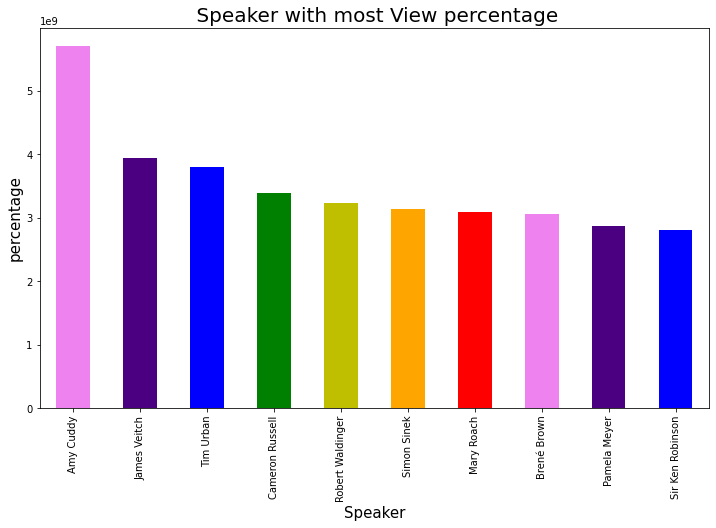

In [ ]:
# Chart - 2 visualization code
# Showing Average view Percentage of Speaker 
# Showing top 10 Viewed speaker
print((df.groupby(['speaker_1'])['views'].mean()*100).sort_values(ascending = False).reset_index(name="Average view %").head(10))
print(" ")

# Speaker vs. View percantage visualization code
# Vizualizing top 10 viewed speaker
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['speaker_1'])['views'].mean())*100).sort_values(ascending = False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" Speaker with most View percentage", fontsize = 20)
plt.xlabel('Speaker', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

                   speaker_1  Average view %
0      British Paraorchestra      10654500.0
1                Nadya Mason      11999900.0
2                Karin Öberg      13177300.0
3              Alicia Eggert      14976500.0
4  Tashka and Laura Yawanawá      15184900.0
5              David Lindell      16286900.0
6                 José Bowen      17227700.0
7               Mark Raymond      17864500.0
8               David Biello      18339000.0
9              Leslie Dodson      18592000.0
 


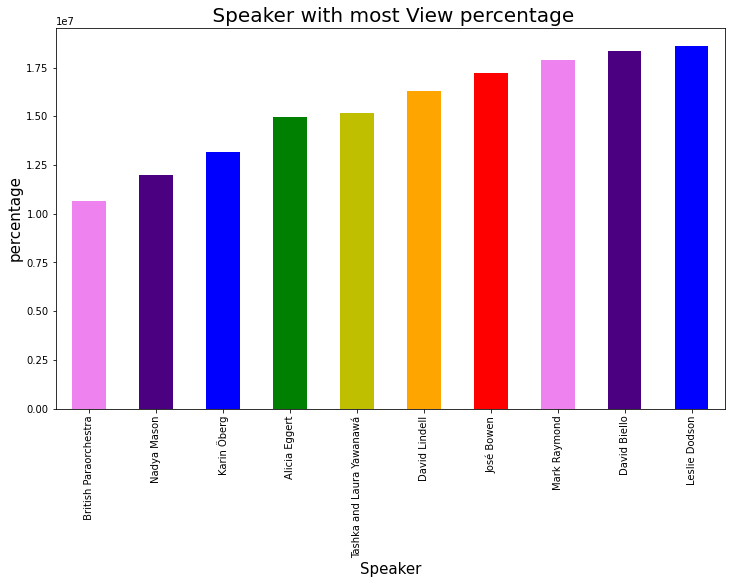

In [ ]:
# Showing Average view Percentage of Speaker 
# Showing bottom 10 Viewed speaker
print((df.groupby(['speaker_1'])['views'].mean()*100).sort_values(ascending = True).reset_index(name="Average view %").head(10))
print(" ")

# Speaker vs. View percantage visualization code
# Vizualizing Bottom 10 viewed speaker
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['speaker_1'])['views'].mean())*100).sort_values(ascending = True).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" Speaker with most View percentage", fontsize = 20)
plt.xlabel('Speaker', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

##### **1. Why did you pick the specific chart?**

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.
Sometimes, bar charts show other statistics, such as percentages.

To show the average view percentage with respect to Speaker, I have used Bar Chart.


#####**2. What is/are the insight(s) found from the chart?**

*In this Bar plot there are showing Top 10 speakers who gain most views. and bottom 10 speakers who gain less views*

From observing the barcharts we can observed. 
1. Amy Cuddy is the top most viewed speaker.
2. British Paraorchista is the very less viewed by audiance.


##### **3. Will the gained insights help creating a positive business impact?** 
**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, This inside help us to bring a speaker like Amy cuddy which have same thought process and the topics which on amy cuddy speaks are more likeable. if we get the topics on which Amy Cuddy is talking we will provide platforms to such people which leads to more views.

There is no such a negative growth impact but the things is there is two show at a time in which stackholders are confuse about which speakers show need to be drop for better view this inside will definietly help to the stackholders.



#### **Chart - 3 - Pie Chart on Variable i.e.,Occupations (Univariate)**

{0: ['writer']}                                   52
{0: ['journalist']}                               43
{0: ['entrepreneur']}                             42
{0: ['artist']}                                   40
{0: ['designer']}                                 37
                                                  ..
{0: ['business professor']}                        1
{0: ['bow designer']}                              1
{0: ['explorer and filmmaker']}                    1
{0: ['composer', 'inventor'], 1: ['musician']}     1
{0: ['law researcher']}                            1
Name: occupations, Length: 1987, dtype: int64


<Axes: ylabel='occupations'>

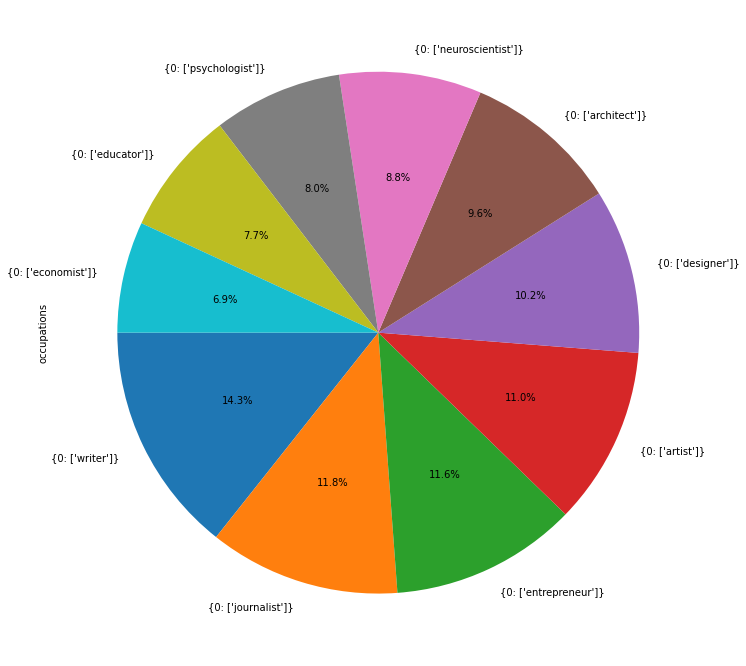

In [ ]:
# Chart - 3 visualization code
# Occupation Column Value Counts

print(df.occupations.value_counts())
df.occupations.value_counts().nlargest(10).plot(kind='pie',
                              figsize=(12,12),
                               autopct="%1.1f%%",
                             
                               startangle=180,            
                                  )

{0: ['writer']}                                   52
{0: ['journalist']}                               43
{0: ['entrepreneur']}                             42
{0: ['artist']}                                   40
{0: ['designer']}                                 37
                                                  ..
{0: ['business professor']}                        1
{0: ['bow designer']}                              1
{0: ['explorer and filmmaker']}                    1
{0: ['composer', 'inventor'], 1: ['musician']}     1
{0: ['law researcher']}                            1
Name: occupations, Length: 1987, dtype: int64


<Axes: ylabel='occupations'>

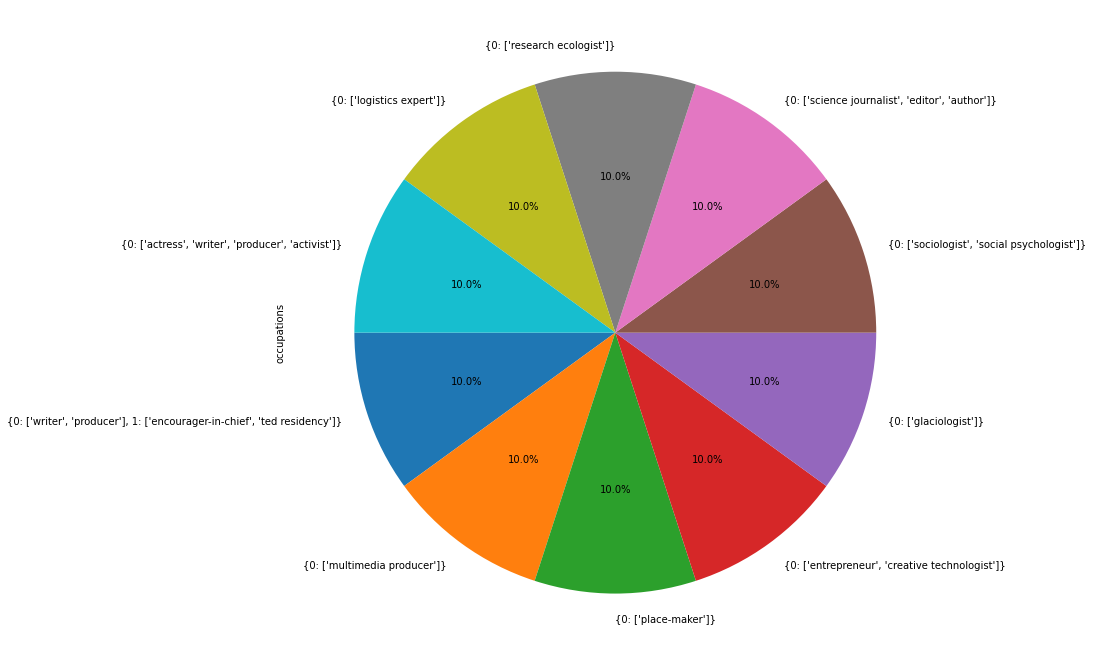

In [ ]:
# Chart - 3 visualization code
# Occupation Column Value Counts

print(df.occupations.value_counts())
df.occupations.value_counts().nsmallest(10).plot(kind='pie',
                              figsize=(12,12),
                               autopct="%1.1f%%",
                             
                               startangle=180,            
                                  )

##### **1. Why did you pick the specific chart?**

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the Speaker percentage occupation wise.

##### **2. What is/are the insight(s) found from the chart?**

1. All type of occupations are invited in ted talks.
2. Most of the writers are invited in ted talks.
3. after writers number of journalist and enterpreniours are share the stages.

##### **3. Will the gained insights help creating a positive business impact?** 
**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, Writers and journalist are come ahead to share the thoughts with compare to other professionals.

only few professional cannot give platform a more views stackholders need to cover all type of professionals. if they stick to the perticular personality which may impact audiance negatively

#### Chart - 4

Text(0.5, 1.0, 'distribution by Recorded year')

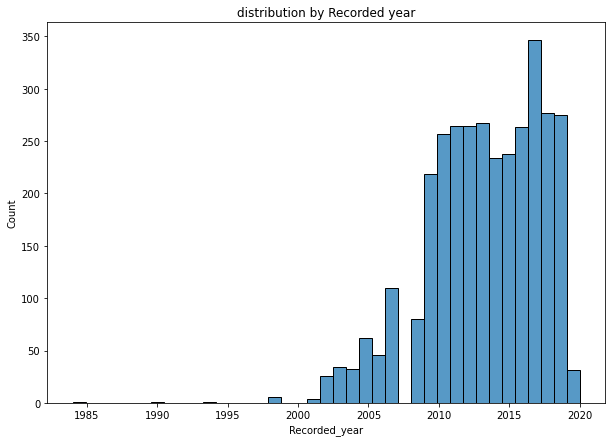

In [ ]:
# Chart - 4 visualization code
# Visualizing the year in which the show was recorded
plt.figure(figsize=(10,7))
sns.histplot(df['Recorded_year'])
plt.title('distribution by Recorded year')

##### **1. Why did you pick the specific chart?**

In statistics, a histogram is a graphical representation of the distribution of data. The histogram is represented by a set of rectangles, adjacent to each other, where each bar represent a kind of data.


##### **2. What is/are the insight(s) found from the chart?**

In this histogram we found Recorded_year 2009 to 2019 more the the Ted talk show was recorded.

##### **3. Will the gained insights help creating a positive business impact?** 
Are there any insights that lead to negative growth? Justify with specific reason.

By using this graph we are conclude that speakers are excited to record from year 2009 to 2019 but after that there is sudden fall in recordings we need to focus on how to improve recordings so that we are not lagged behind the market.


#### Chart - 5

Text(0.5, 1.0, 'distribution by Published year')

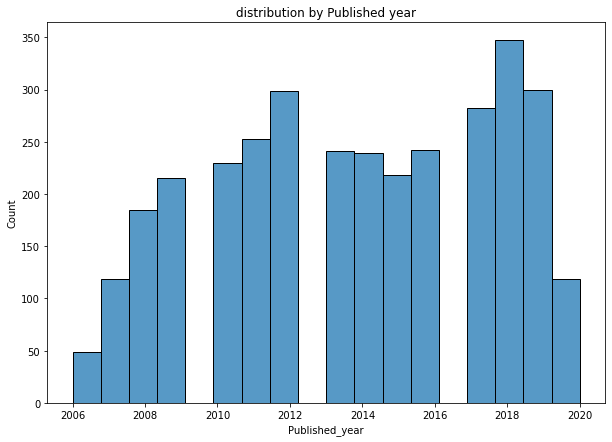

In [ ]:
# Chart - 5 visualization code
# Visualizing the year in which the show was Published
plt.figure(figsize=(10,7))
sns.histplot(df['Published_year'])
plt.title('distribution by Published year')

##### **1. Why did you pick the specific chart?**

In statistics, a histogram is a graphical representation of the distribution of data. The histogram is represented by a set of rectangles, adjacent to each other, where each bar represent a kind of data.



##### **2. What is/are the insight(s) found from the chart?**

In this histogram we found in Year 2012 and 2018 Published most of the recordings.

#### Chart - 6

   duration  Average view %
0       629        149765.0
1       187        183390.0
2       966        216356.0
3       203        217968.0
4      1025        218475.0
5      1368        229483.0
6       442        241616.0
7       173        262039.0
8       510        281604.0
9      1899        284657.0
 


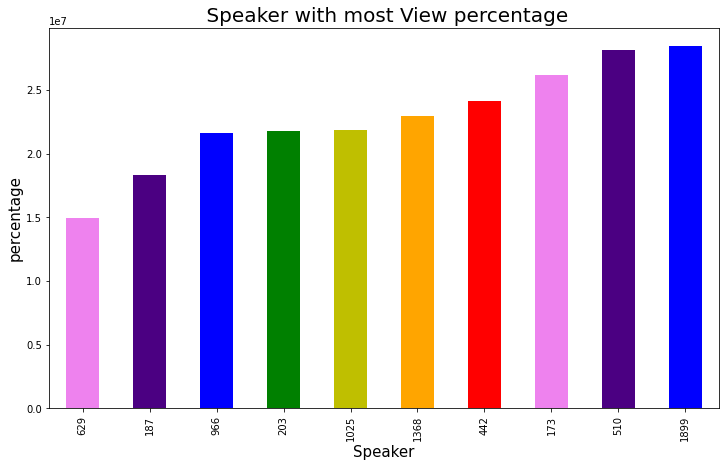

In [ ]:
# Chart - 6 visualization code
print((df.groupby(['duration'])['views'].mean()).sort_values(ascending = True).reset_index(name="Average view %").head(10))
print(" ")

# Speaker vs. View percantage visualization code
# Vizualizing top 10 viewed speaker
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['duration'])['views'].mean())*100).sort_values(ascending = True).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" Speaker with most View percentage", fontsize = 20)
plt.xlabel('Speaker', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

##### **1. Why did you pick the specific chart?**

In this count plot we found videos having duration 1899 are got more views than videos having duration 629.

##### **2. What is/are the insight(s) found from the chart?**

Speaker having videos duration 1899 are most liked and viewd by audiance of tedtalk.


#### Chart - 7

<Axes: xlabel='native_lang', ylabel='count'>

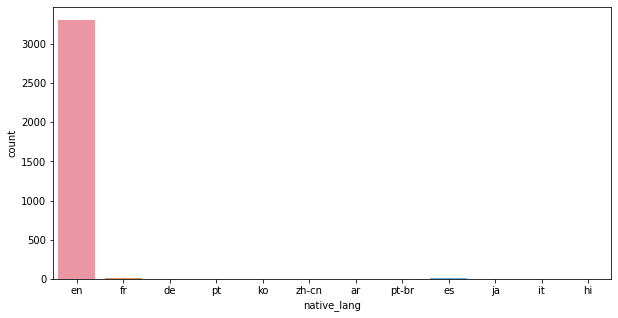

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='native_lang',data=df)

##### **1. Why did you pick the specific chart?**

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

##### **2. What is/are the insight(s) found from the chart?**

In this count plot we found videos having english language are most views.

#### Chart - 8


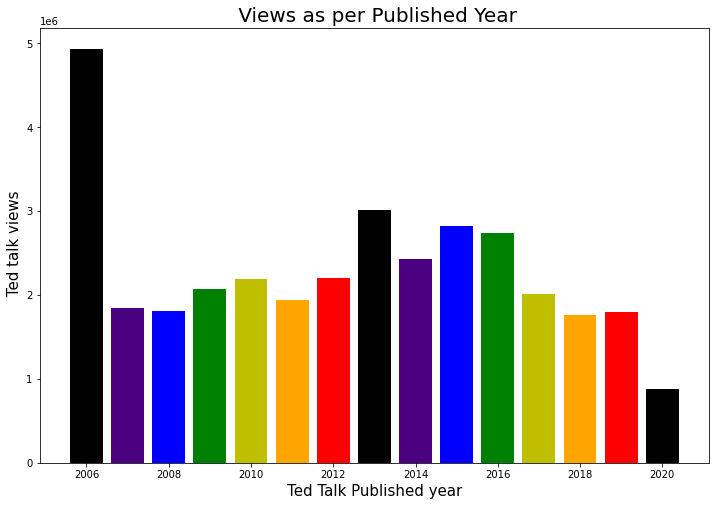

In [ ]:
# Chart - 8 visualization code
# views as per published year shows in the dataset
plt.rcParams['figure.figsize'] = (12, 8)


s1=list(df['Published_year'].unique())
s2=list(df.groupby(['Published_year'])['views'].mean())
plt.bar(s1,s2, color = ['black','indigo','b','g','y','orange','r'])


plt.title(" Views as per Published Year", fontsize = 20)
plt.xlabel('Ted Talk Published year', fontsize = 15)
plt.ylabel(' Ted talk views', fontsize = 15)
plt.show()

#### Chart - 9

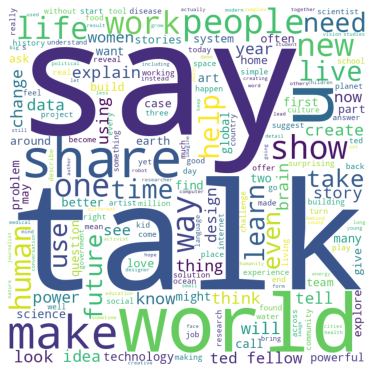

In [ ]:
# Chart - 9 visualization code
# Building a wordcloud for the movie descriptions
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

#### Chart - 10

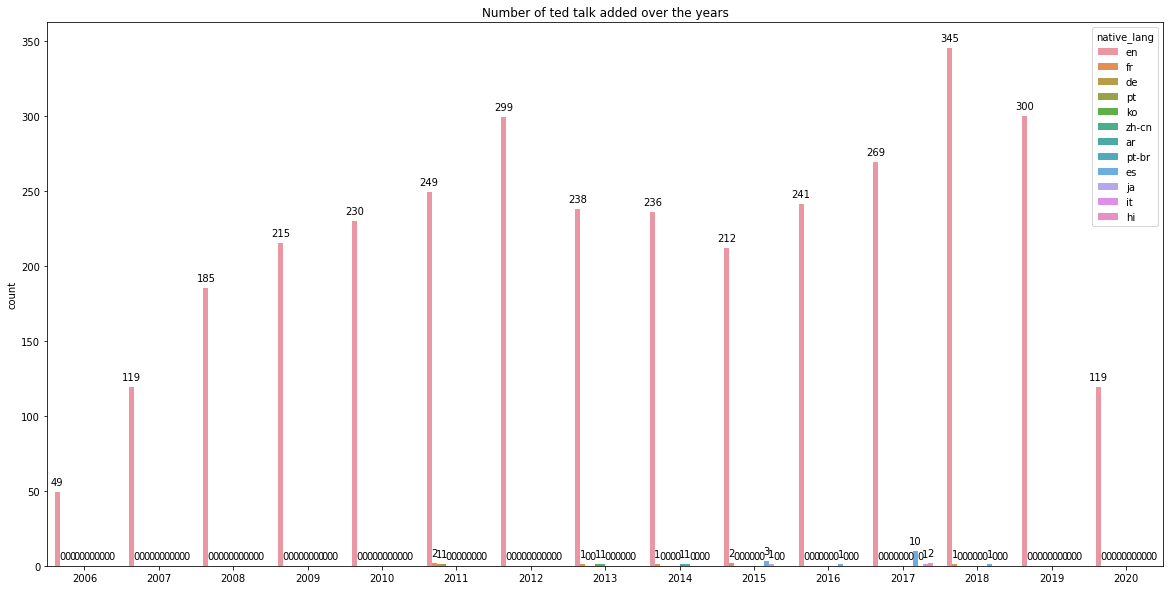

In [ ]:
# Chart - 10 visualization code
# Number of ted talk added over the years
plt.figure(figsize=(20,10))
p = sns.countplot(x='Published_year',data=df, hue='native_lang')
plt.title('Number of ted talk added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Chart - 11

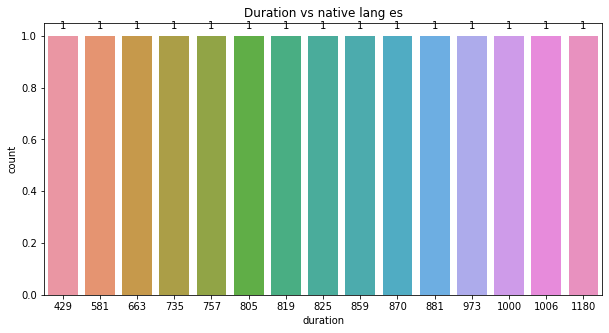

In [ ]:
# Chart - 11 visualization code
# Duration vs native language es.
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['native_lang']=='es'])
plt.title('Duration vs native lang es')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

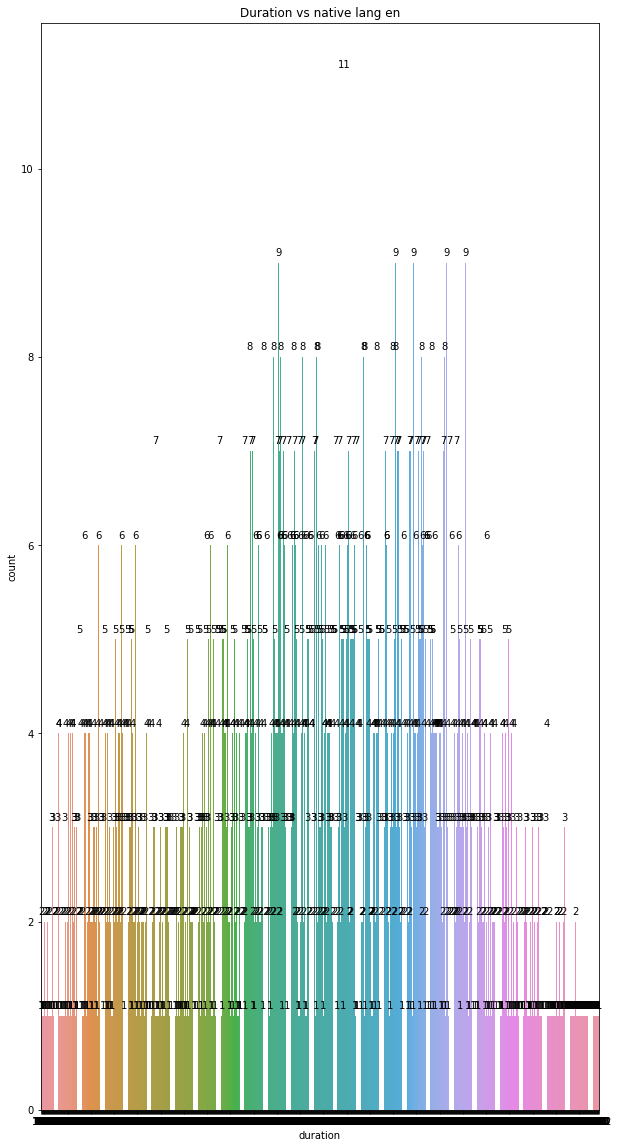

In [ ]:
# # Duration vs native language en.

plt.figure(figsize=(10,20))
p = sns.countplot(x='duration',data=df[df['native_lang']=='en'])
plt.title('Duration vs native lang en')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

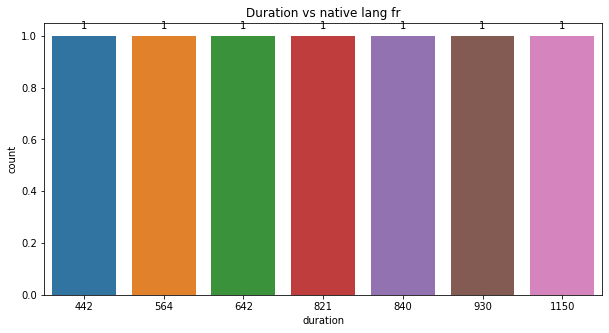

In [ ]:
# Duration vs native lang fr
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['native_lang']=='fr'])
plt.title('Duration vs native lang fr')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

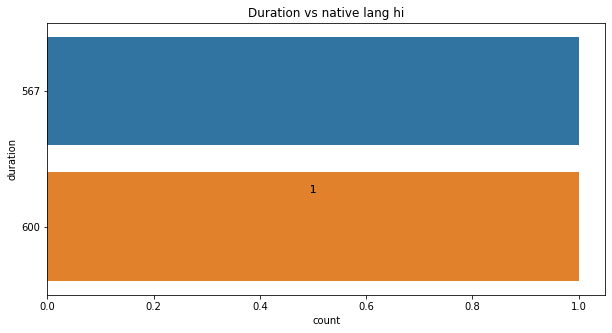

In [ ]:
# Duration vs native lang hi
plt.figure(figsize=(10,5))
p = sns.countplot(y='duration',data=df[df['native_lang']=='hi'])
plt.title('Duration vs native lang hi')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Chart - 12 - Correlation Heatmap

,talk_id,views,comments,duration,Recorded_month,Recorded_year,published_month,Published_year
talk_id,1.000000,-0.085996,-0.232949,-0.075302,0.140709,0.628441,-0.047175,0.673623
views,-0.085996,1.000000,0.500676,0.077180,-0.053421,-0.027789,-0.019175,-0.046984
comments,-0.232949,0.500676,1.000000,0.175329,-0.102975,-0.267213,-0.019362,-0.307625
duration,-0.075302,0.077180,0.175329,1.000000,-0.020580,-0.216293,0.006008,-0.184099
Recorded_month,0.140709,-0.053421,-0.102975,-0.020580,1.000000,0.231831,0.001484,0.266524
Recorded_year,0.628441,-0.027789,-0.267213,-0.216293,0.231831,1.000000,-0.010225,0.956360
published_month,-0.047175,-0.019175,-0.019362,0.006008,0.001484,-0.010225,1.000000,-0.096989
Published_year,0.673623,-0.046984,-0.307625,-0.184099,0.266524,0.956360,-0.096989,1.000000


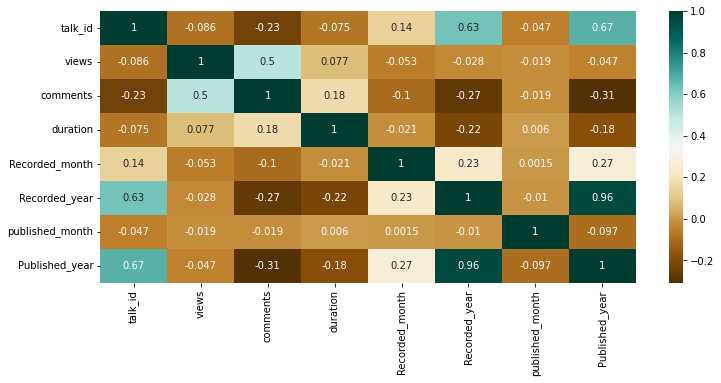

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

##### **1. Why did you pick the specific chart?**

Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships.

#### Chart - 13 - Pair Plot 

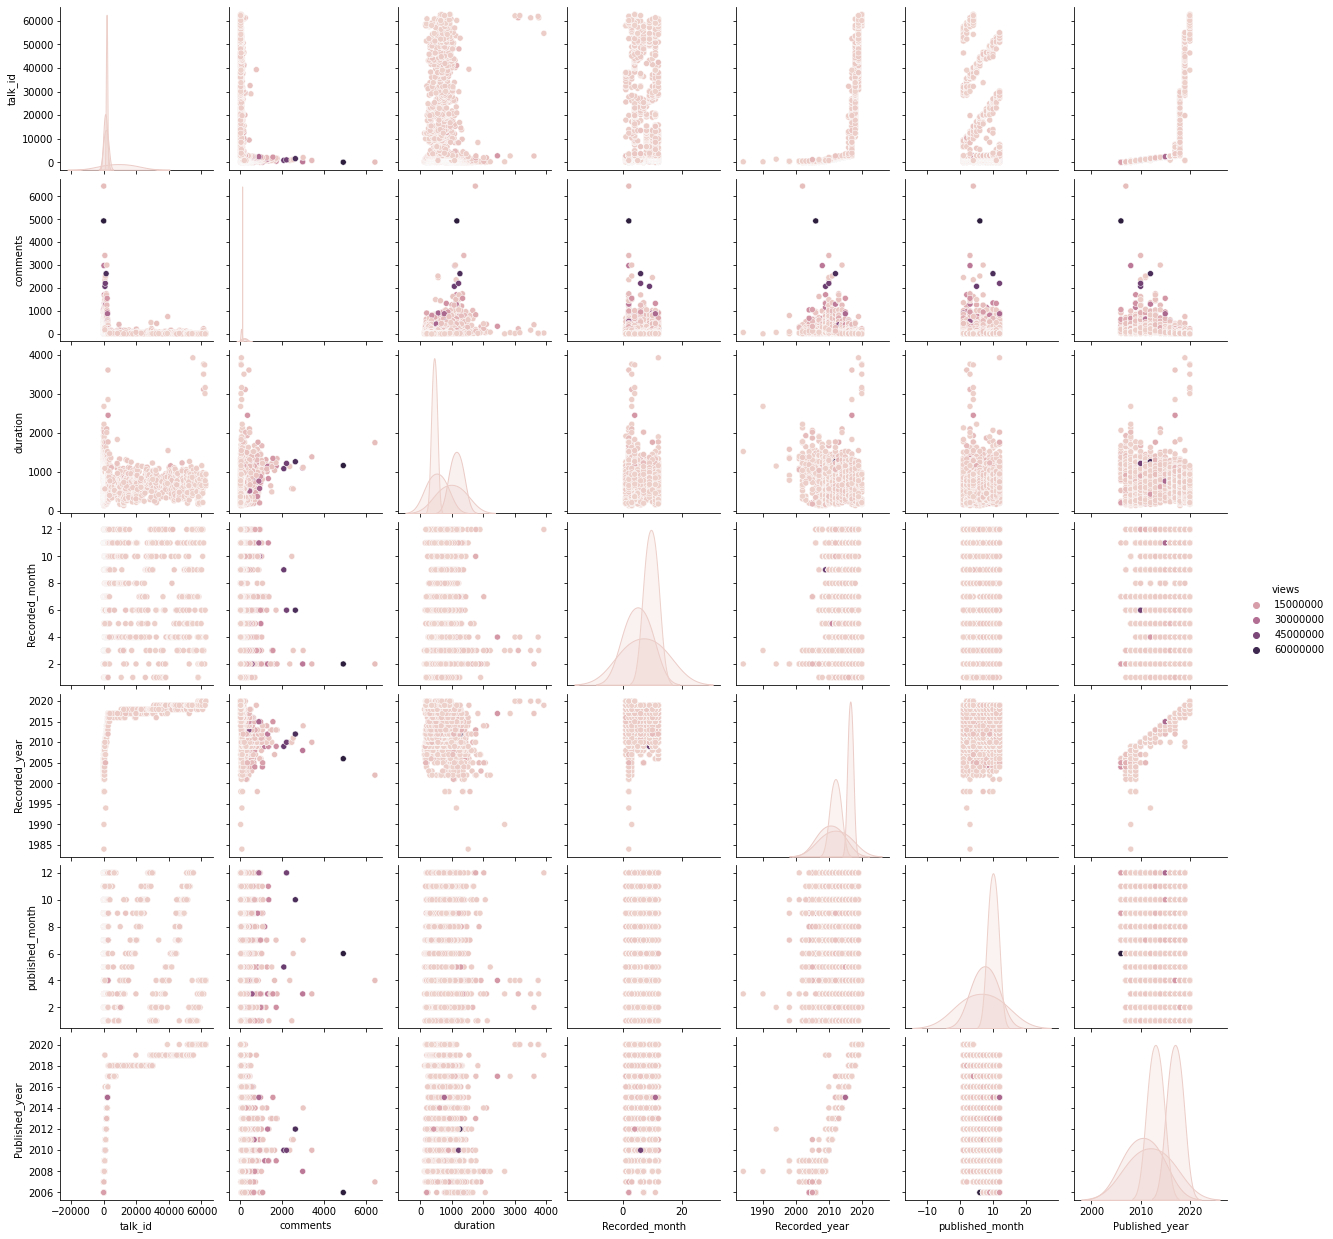

In [ ]:
# Pair Plot visualization code
# pairplot with hue views
sns.pairplot(df, hue ='views')
# to show
plt.show()

##### **1. Why did you pick the specific chart?**

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

## ***5.Data Cleaning***

In [ ]:
df.describe().columns

Index(['talk_id', 'views', 'comments', 'duration', 'Recorded_month',
       'Recorded_year', 'published_month', 'Published_year'],
      dtype='object')

In [ ]:
df1=df[['views','duration','Recorded_year','Published_year']]

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)



In [ ]:
df1 = clean_dataset(df1)

## ***6. ML Model Implementation***

### ML Model - 1 Linear Regression

In [ ]:

# choose appropriate dependent and independent variables
y = df1['views'].values
x =df1.drop(columns=['views']).values

In [ ]:
# Printing f_scores for independent features.

f_scores = f_regression(x,y)
f_scores

(array([19.9907828 ,  2.57819863,  7.38062064]),
 array([8.04081166e-06, 1.08439545e-01, 6.62706678e-03]))

In [ ]:

# split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [ ]:

print("The shape of train dataset :")
print(x_train.shape)

print("\n The shape of test dataset :")
print(x_test.shape)

The shape of train dataset :
(2670, 3)

 The shape of test dataset :
(668, 3)


In [ ]:

print(" dependent variable in train :")
print(y_train.shape)

print("\n  dependent variable in test :")
print(y_test.shape)

 dependent variable in train :
(2670,)

  dependent variable in test :
(668,)


In [ ]:

#cheack the column of independent variable
x_train
     

array([[ 559., 2007., 2008.],
       [1217., 2016., 2016.],
       [ 140., 2008., 2008.],
       ...,
       [ 277., 2014., 2014.],
       [ 656., 2017., 2018.],
       [ 927., 2018., 2018.]])

In [ ]:

#check the value in dependent variable
y_train

array([ 390568., 2026875.,  840407., ...,  801592., 1155882., 2311233.])

In [ ]:
# Transforming data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
 

In [ ]:

# initialize and fit linear regression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:

#check linear regressor intercept
regressor.intercept_

2169450.105992511

In [ ]:

#check linear regressor coefficient
regressor.coef_

array([ 226347.95394399,  842229.7323804 , -888990.89296223])

In [ ]:
#predict the train and test data
y_pred_train=regressor.predict(x_train)
y_pred_test=regressor.predict(x_test)
     

In [ ]:
# Get the r2_score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [ ]:

#linear regressor of value of MAE,MSE,RMSE,r2_score

MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared for testing data
adj_r2_test = 1 - ( ( 1- regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")


MAE : 1636852.7789883735
MSE : 17075892470421.906
RMSE : 4132298.690852575
r2_score_train : 0.009338293301837997
r2_score_test : 0.01656865247379269
Adjusted R2 Score for Trainning Data : 0.008223520188524125
Adjusted R2 Score for Testing Data : 0.012125438554246526


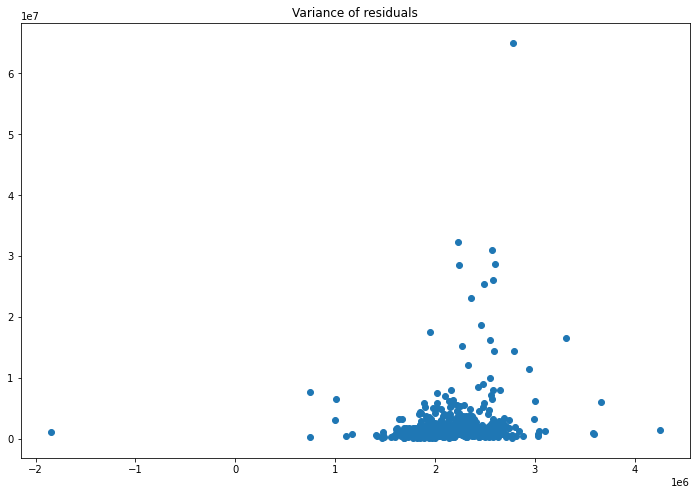

In [ ]:

# Check for homoscadacity
plt.scatter(y_pred_test, y_test)
plt.title('Variance of residuals')
plt.show()

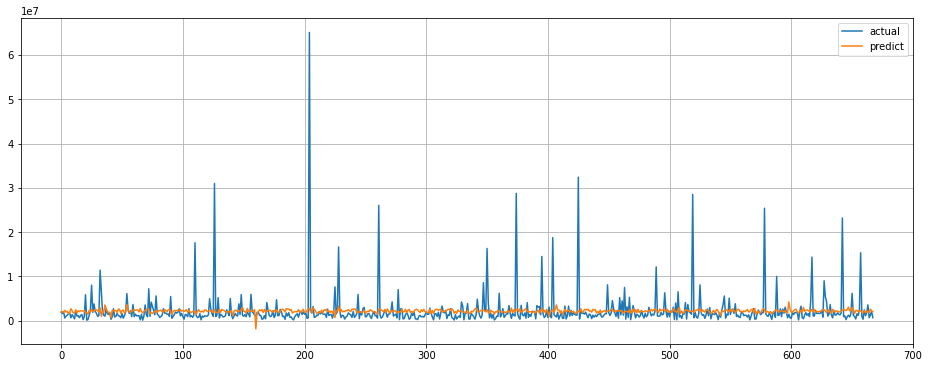

In [ ]:

# On Test data Linear regression actual vs predicted.
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()

plt.legend(['actual','predict'])
plt.show()

###  ML Model - 2 :  Lasso Linear Regression

In [ ]:
# Finding best alpha value using GridseachCV hyperprarameter tuning for Lasso regulerization
lasso = Lasso()
parameters = {'alpha': [ 1e-16,1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,15,20,25]}
lasso = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-16, 1e-15, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 1, 5, 10, 15, 20, 25]},
             scoring='neg_mean_squared_error')

In [ ]:

# best alpha value
print(lasso.best_params_)

{'alpha': 25}


In [ ]:
# Fitting the model with best parameter
lasso_regressor = Lasso(alpha=25)
lasso_regressor.fit(x_train, y_train)

Lasso(alpha=25)

In [ ]:

# check lasso intercept
lasso_regressor.intercept_

2169450.105992511

In [ ]:

#check lasso coefficient
lasso_regressor.coef_
     

array([ 226296.55575131,  841592.06549063, -888364.5199388 ])

In [ ]:
#predict the train and test data
y_pred_train=lasso_regressor.predict(x_train)
y_pred_test=lasso_regressor.predict(x_test)
     

In [ ]:

# Get the r2_score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [ ]:

#lasso regressor of value of MAE,MSE,RMSE,r2_score

MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- lasso_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared for testing data
adj_r2_test = 1 - ( ( 1- lasso_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 1636835.9158674479
MSE : 17075916023776.252
RMSE : 4132301.5407610624
r2_score_train : 0.009338290357067347
r2_score_test : 0.01656729599377016
Adjusted R2 Score for Trainning Data : 0.008223517240439904
Adjusted R2 Score for Testing Data : 0.012124075945549317


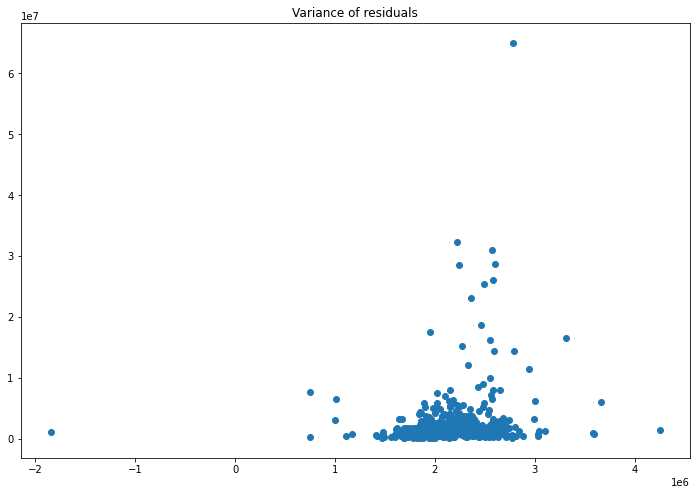

In [ ]:

# Check for homoscadacity
plt.scatter(y_pred_test, y_test)
plt.title('Variance of residuals')
plt.show()

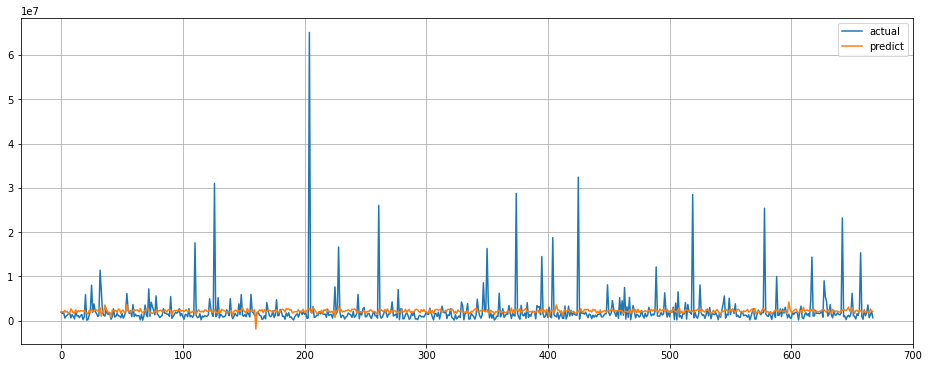

In [ ]:

# On Test data Lasso Model actual vs predicted.
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()

plt.legend(['actual','predict'])
plt.show()

###  ML Model - 3 : Ridge Linear Regression

In [ ]:
# Finding best alpha value using GridseachCV hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': np.arange(0.00001,1,0.5)}
ridge = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge.fit(x_train,y_train)
     

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.0000e-05, 5.0001e-01])},
             scoring='neg_mean_squared_error')

In [ ]:

# print best alpha value
print(ridge.best_params_)

{'alpha': 0.50001}


In [ ]:

# Fitting the model with best parameter
ridge_regressor = Ridge(alpha=0.50001)
ridge_regressor.fit(x_train, y_train)
     

Ridge(alpha=0.50001)

In [ ]:


#check ridge coefficient
ridge_regressor.coef_

array([ 226145.73526009,  838217.10269722, -885017.53317539])

In [ ]:

#check ridge intercept
ridge_regressor.intercept_

2169450.105992511

In [ ]:

#predict the train and test dataset
y_pred_train=ridge_regressor.predict(x_train)
y_pred_test=ridge_regressor.predict(x_test)

In [ ]:
# Get the r2 score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [ ]:
#ridge regressor of value of MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- ridge_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared for testing data
adj_r2_test = 1 - ( ( 1- ridge_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 1636741.197345976
MSE : 17075980605438.764
RMSE : 4132309.355002208
r2_score_train : 0.009338177935841463
r2_score_test : 0.01656357661971697
Adjusted R2 Score for Trainning Data : 0.008223404692708436
Adjusted R2 Score for Testing Data : 0.012120339767095145


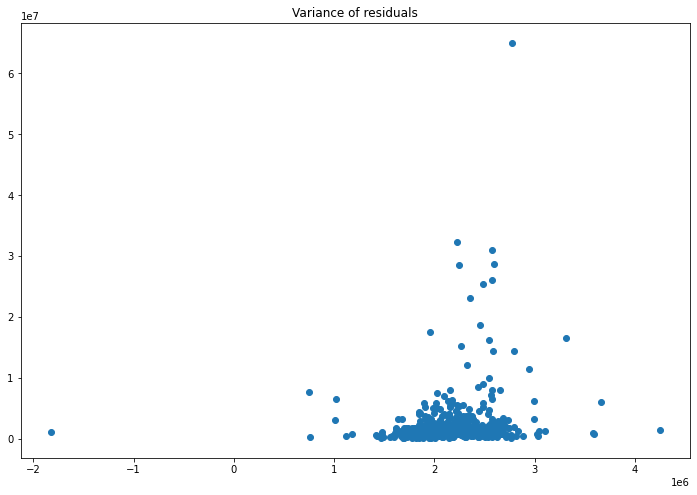

In [ ]:

# Check for homoscadacity
plt.scatter(y_pred_test, y_test)
plt.title('Variance of residuals')
plt.show()

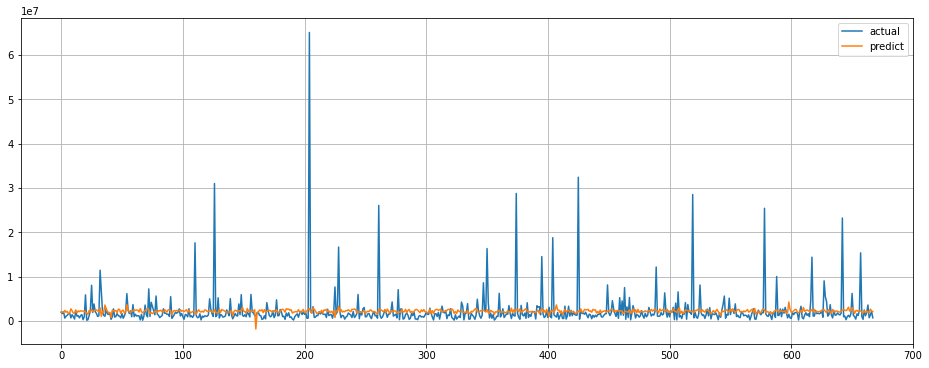

In [ ]:
# On Test data Ridge model actual vs predicted
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.legend(['actual','predict'])
plt.show()
     

### ML Model - 4 : Elasticnet Regression

In [ ]:

#initialize and fit elasticnet regression
elastic = ElasticNet()
parameters = {'alpha': [1e-50,1e-40,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-50, 1e-40, 1e-08, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [ ]:

# print best alpha value
print(elastic.best_params_)

{'alpha': 0.01, 'l1_ratio': 0.7}


In [ ]:
# Fitting the model with best parameter
elasticnet_regressor = ElasticNet(alpha=0.01,l1_ratio=0.7)
elasticnet_regressor.fit(x_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.7)

In [ ]:
#check elastic coefficient
elasticnet_regressor.coef_

array([ 223281.89621414,  782096.8380192 , -829448.73018901])

In [ ]:

#check elastic intercept
elasticnet_regressor.intercept_

2169450.105992511

In [ ]:

#predict the train and test dataset
y_pred_train=elasticnet_regressor.predict(x_train)
y_pred_test=elasticnet_regressor.predict(x_test)

In [ ]:

# Get the r2 score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [ ]:

#elasticnet regressor of value of MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- elasticnet_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared
adj_r2_test = 1 - ( ( 1- elasticnet_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")
     

MAE : 1635211.0249295891
MSE : 17077598141632.209
RMSE : 4132505.0685549327
r2_score_train : 0.009312381561112804
r2_score_test : 0.0164704198022243
Adjusted R2 Score for Trainning Data : 0.008197579289801249
Adjusted R2 Score for Testing Data : 0.012026762060366902


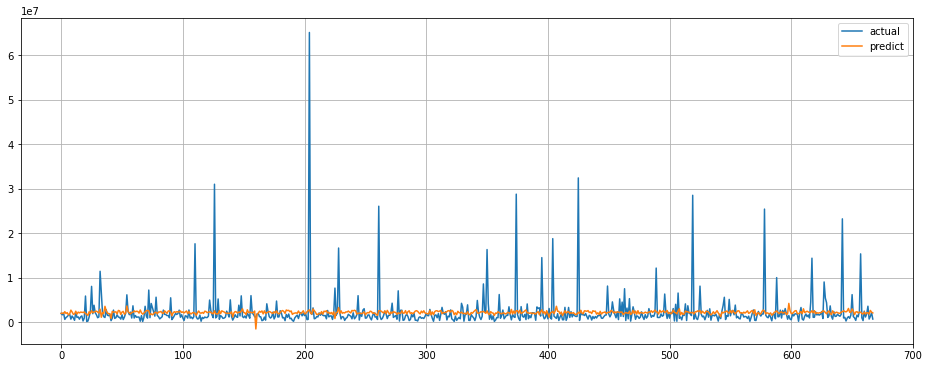

In [ ]:
# On Test data elastinet 
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.legend(['actual','predict'])
plt.show()
     

### ML Model - 5 : Decision Tree

In [ ]:
 # Decison Tree Regressor model trainning on best parameters got from GridsearchCV hyperparameter tuning.
tree_regressor = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 9, max_leaf_nodes=76, min_samples_leaf = 1, min_samples_split=2) 
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=9, max_leaf_nodes=76)

In [ ]:

# Trainning Score on Decision Tree Regressor with best parameters

tree_regressor.score(x_train, y_train)

0.5137982051322507

In [ ]:

#predict the train and test dataset
y_pred_train=tree_regressor.predict(x_train)
y_pred_test=tree_regressor.predict(x_test)

In [ ]:

# Get the roc_auc score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [ ]:

#Desicision regressor of value of MAE,MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- tree_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared
adj_r2_test = 1 - ( ( 1- tree_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 1720136.3679061313
MSE : 23239033629720.797
RMSE : 4820688.086748695
r2_score_train : 0.5137982051322507
r2_score_test : -0.3383777273878852
Adjusted R2 Score for Trainning Data : 0.5132510913345751
Adjusted R2 Score for Testing Data : -0.34442461471042085


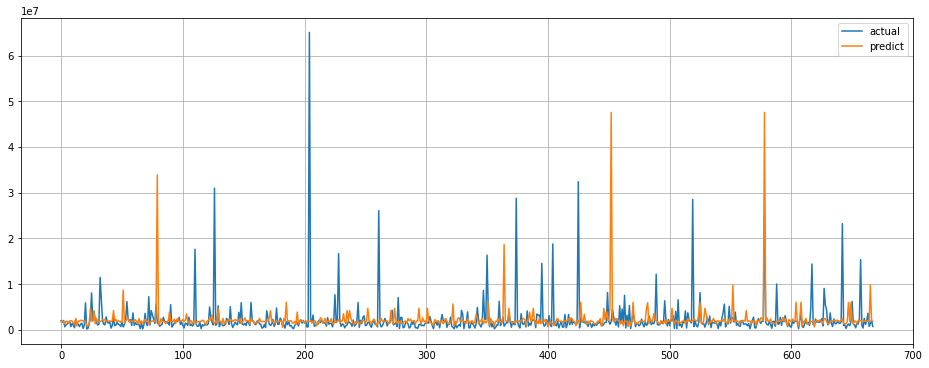

In [ ]:

# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()

plt.legend(['actual','predict'])
plt.show()

### ML Model - 6 : Random Forest Regressor

In [ ]:


# Hyperparameter tuning for Random Forest Regressor
rfr = RandomForestRegressor()
# grid_values = {'n_estimators':list(np.arange(1,100)), 'max_depth':list(np.arange(1,20))}
param_grid = { 
            "n_estimators"      : np.arange(50,100),
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : np.arange(1,6),
            "bootstrap": [True, False]
            }
# random_forest_gridsearch = GridSearchCV(estimator = dtr, param_grid = grid_values, scoring = 'roc_auc', cv=5)
random_forest= GridSearchCV(rfr, param_grid, n_jobs=-1, cv=5)
random_forest.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:

random_forest.best_params_
     

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 52}

In [ ]:

# Random Forest Regressor model trainning on best parameters got from GridsearchCV hyperparameter tuning.
random_forest_best = RandomForestRegressor(bootstrap= True, max_features = 'auto', min_samples_split = 2, n_estimators = 58) 
random_forest_best.fit(x_train, y_train)

RandomForestRegressor(max_features='auto', n_estimators=58)

In [ ]:

y_pred_train=random_forest_best.predict(x_train)
y_pred_test=random_forest_best.predict(x_test)
     

In [ ]:

# Get the r2 score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [ ]:
#randomforest regressor of value of MAE,MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- random_forest_best.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared
adj_r2_test = 1 - ( ( 1- random_forest_best.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")


MAE : 1810356.6154577131
MSE : 20605745260461.145
RMSE : 4539355.159101471
r2_score_train : 0.7564541878841128
r2_score_test : -0.18672191590442688
Adjusted R2 Score for Trainning Data : 0.7561801303310942
Adjusted R2 Score for Testing Data : -0.19208361130760965


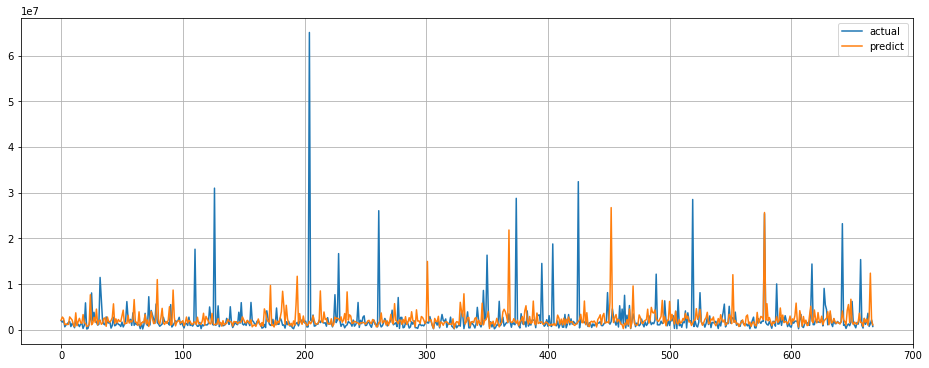

In [ ]:

# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()
plt.legend(['actual','predict'])
plt.show()

### ML Model - 7 : Gradient Boosting Regressor

In [ ]:


#initialize and fit GradientBoosting regressor
gb_regressor=GradientBoostingRegressor()
gb_regressor.fit(x_train,y_train)


GradientBoostingRegressor()

In [ ]:

y_pred_train=gb_regressor.predict(x_train)
y_pred_test=gb_regressor.predict(x_test)
     

In [ ]:

# Get the r2 score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)
     

In [ ]:
#Gradient boosting regressor of value of MAE,MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- gb_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared
adj_r2_test = 1 - ( ( 1- gb_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 1635418.377229396
MSE : 17576062607361.266
RMSE : 4192381.4959234404
r2_score_train : 0.33325577564345854
r2_score_test : -0.012237044951080467
Adjusted R2 Score for Trainning Data : 0.3325055008223522
Adjusted R2 Score for Testing Data : -0.016810405093931724


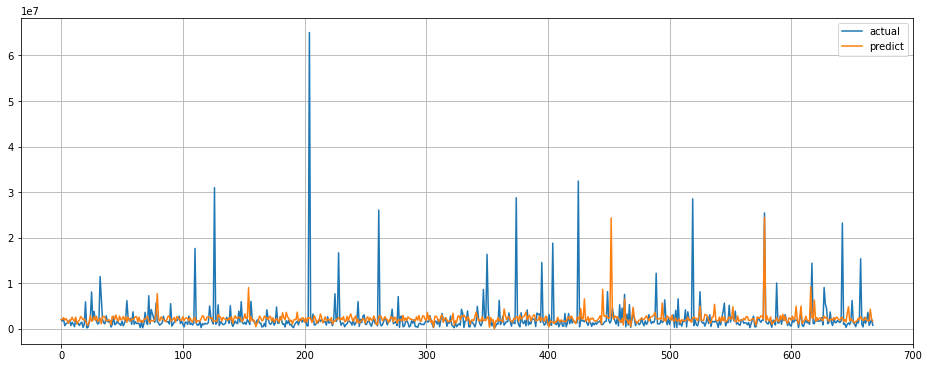

In [ ]:

# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()

plt.legend(['actual','predict'])
plt.show()

### ML Model - 8 : XGB Regressor

In [ ]:

#initialize and fit XGB regressor
xgb_regressor=XGBRegressor()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic = GridSearchCV(xgb_regressor, parameters, scoring='neg_mean_squared_error',cv=5)
xgb_regressor.fit(x_train,y_train)
     

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:

# Trainning Score on XGB Regressor with best parameters
xgb_regressor.score(x_train, y_train)

0.8006338456037014

In [ ]:

y_pred_train=xgb_regressor.predict(x_train)
y_pred_test=xgb_regressor.predict(x_test)

In [ ]:

# Get the r2 score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [ ]:

#XGB regressor of value of MAE,MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

# adjusted R-squared for trainning data
adj_r2_train = 1 - ( ( 1- xgb_regressor.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Trainning Data : {adj_r2_train}")

# adjusted R-squared
adj_r2_test = 1 - ( ( 1- xgb_regressor.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
print(f"Adjusted R2 Score for Testing Data : {adj_r2_test}")

MAE : 1934683.0455300338
MSE : 24003491652579.84
RMSE : 4899335.837904954
r2_score_train : 0.8006338456037014
r2_score_test : -0.38240423931689316
Adjusted R2 Score for Trainning Data : 0.8004095025942533
Adjusted R2 Score for Testing Data : -0.38865004160296346


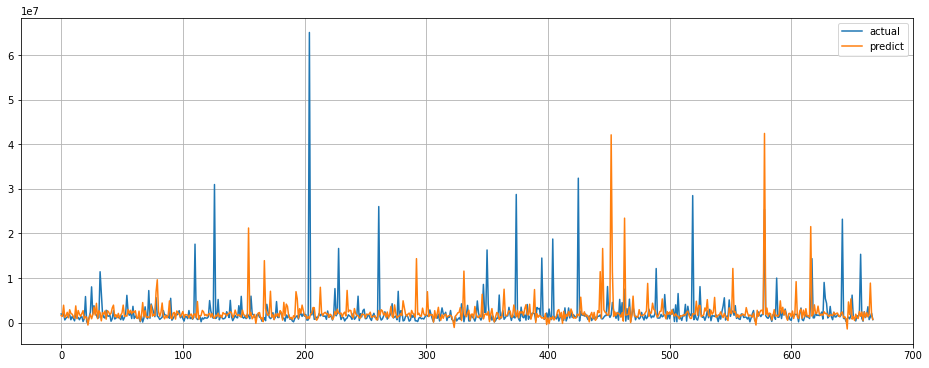

In [ ]:

# On Test data
plt.figure( figsize=(16,6) )
plt.plot(np.array(y_test))
plt.plot( np.array(y_pred_test))
plt.grid()

plt.legend(['actual','predict'])
plt.show()
     

### 9 : Define All Models

In [ ]:

#Define all models 
model=[
    ['LinearRegression:',regressor],
    ['Lasso:',lasso_regressor],
    ['Ridge:',ridge_regressor],
    ['ElasticNetCV:',elasticnet_regressor],
    ['DecisionTreeRegression:',tree_regressor],
    ['RandomForestRegressor:',random_forest_best],
    ['GradientBoosting Regressor:',gb_regressor],
    ['XGB regressor :',xgb_regressor]
    
]

In [ ]:

print(model)

[['LinearRegression:', LinearRegression()], ['Lasso:', Lasso(alpha=25)], ['Ridge:', Ridge(alpha=0.50001)], ['ElasticNetCV:', ElasticNet(alpha=0.01, l1_ratio=0.7)], ['DecisionTreeRegression:', DecisionTreeRegressor(criterion='friedman_mse', max_depth=9, max_leaf_nodes=76)], ['RandomForestRegressor:', RandomForestRegressor(max_features='auto', n_estimators=58)], ['GradientBoosting Regressor:', GradientBoostingRegressor()], ['XGB regressor :', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
           

In [ ]:
model_data=[]
for name,current_model in model:
  curr_model_data={}
  current_model.random_state=1
  curr_model_data['Name']=name
  if(name!='LinearRegression: '):
    current_model.fit(x_train,y_train)
    curr_model_data['MAE']=mean_absolute_error(y_test,current_model.predict(x_test))
    curr_model_data['MSE']=mean_squared_error(y_test,current_model.predict (x_test))
    curr_model_data['RMSE']=np.sqrt(mean_squared_error(y_test, current_model.predict(x_test)))
    curr_model_data['R2_score_train']=r2_score(y_train,current_model.predict (x_train))
    curr_model_data['R2_score_test']=r2_score(y_test,current_model.predict (x_test))
    curr_model_data['adj_R2_score_train']= 1 - ( ( 1- current_model.score(x_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) ) 
    curr_model_data['adj_R2_score_test']=1 - ( ( 1- current_model.score(x_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 ) )
    model_data.append(curr_model_data)

In [ ]:
# create dataframe with evaluation metrics
table_df=pd.DataFrame(model_data)
table_df
     

,Name,MAE,MSE,RMSE,R2_score_train,R2_score_test,adj_R2_score_train,adj_R2_score_test
0,LinearRegression:,1.636853e+06,1.707589e+13,4.132299e+06,0.009338,0.016569,0.008224,0.012125
1,Lasso:,1.636836e+06,1.707592e+13,4.132302e+06,0.009338,0.016567,0.008224,0.012124
2,Ridge:,1.636741e+06,1.707598e+13,4.132309e+06,0.009338,0.016564,0.008223,0.012120
3,ElasticNetCV:,1.635211e+06,1.707760e+13,4.132505e+06,0.009312,0.016470,0.008198,0.012027
4,DecisionTreeRegression:,1.708691e+06,2.314150e+13,4.810561e+06,0.513798,-0.332760,0.513251,-0.338782
5,RandomForestRegressor:,1.854225e+06,2.098487e+13,4.580925e+06,0.755114,-0.208557,0.754839,-0.214017
6,GradientBoosting Regressor:,1.635071e+06,1.757439e+13,4.192182e+06,0.333256,-0.012141,0.332506,-0.016714
7,XGB regressor :,1.934683e+06,2.400349e+13,4.899336e+06,0.800634,-0.382404,0.800410,-0.388650


# **Conclusion**

1.In this project, The main objective is to build a predictive model, which could help in predicting the views of videos uploaded on the TEDX websites.

2.The dataset contained about 4005 records, and 19 attributes. We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

3.It was found that TEDX hosts more Videos in 2018 on its platform, and the total number of shows added on TEDX is growing exponentially. Also, majority of the shows were produced in the English language, and the majority of the shows on TEDX were created for adults and young adults age group.

4.Once obtained the required insights from the EDA, we start with Pre-processing the text data by conveting it to date time format. This filtered data is passed through Data cleaning process. Then we are divide the dependant and independant variables after that we conducting a train test split now our data is ready to fit in ML models.

5.A simple linear regression model was built and it was evaluated using accuracy,mean absoulte error, mean squared error, root mean squared error, r2_score_train and r2_score_test,adjusted r2_train,adjusted r2_test.

6.Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression etc.

7.We have implemented Cross Validation on different algorithm as CV performs better on small datasets.But, the result is nearly same

8.Regression models namely random forest regressor, xgboost regressor are build.

### ***We  successfully completed your Machine Learning Capstone Project !!!***